In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
df = data.copy()
df.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


In [ ]:
df.shape

(986, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


<Axes: >

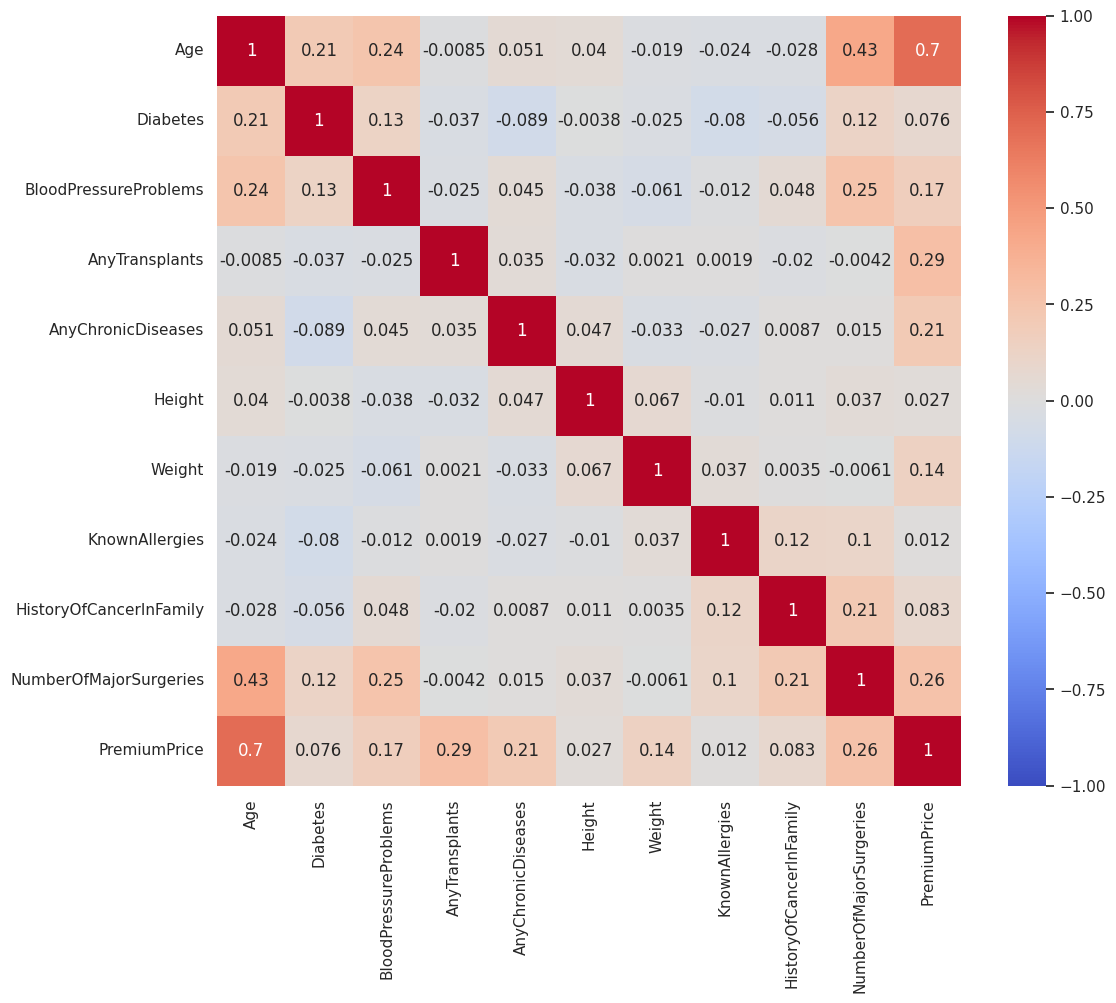

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

- Age is related strongly to Premium Price


<ipython-input-18-97e061578e6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


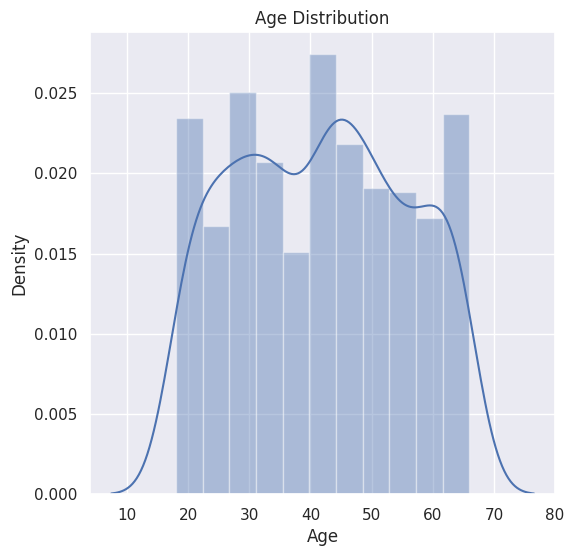

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

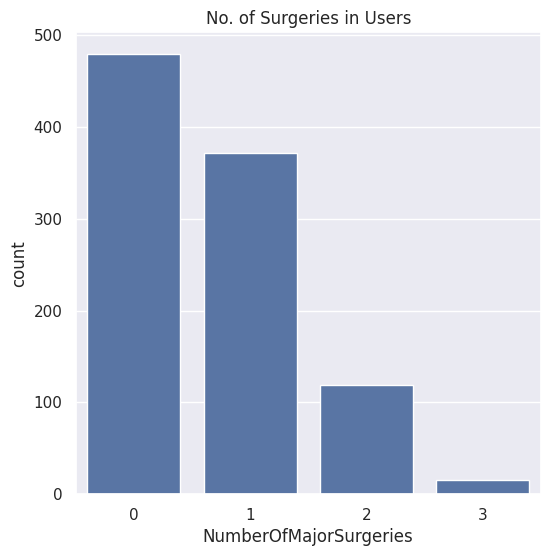

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.title('No. of Surgeries in Users')
plt.show()

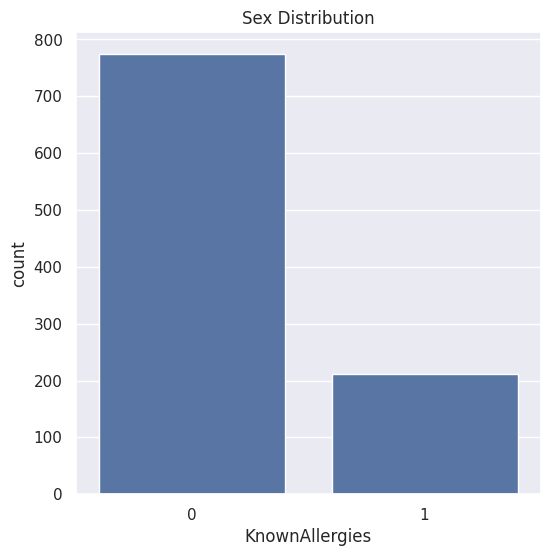

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='KnownAllergies', data=df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['Diabetes'].value_counts()

,count
Diabetes,
0,572
1,414


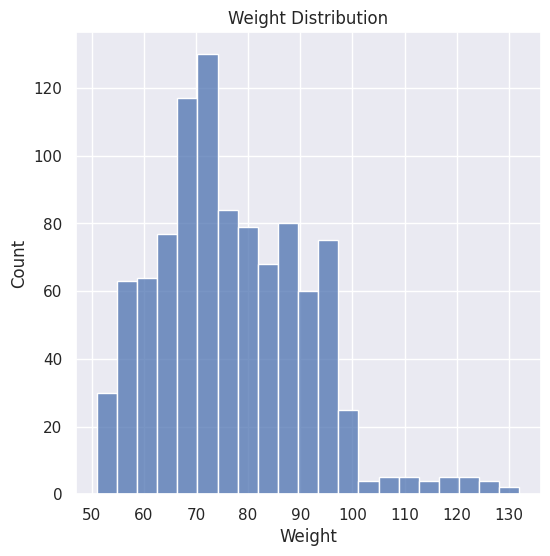

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(df['Weight'])
plt.title('Weight Distribution')
plt.show()

<ipython-input-25-227d57f5f391>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


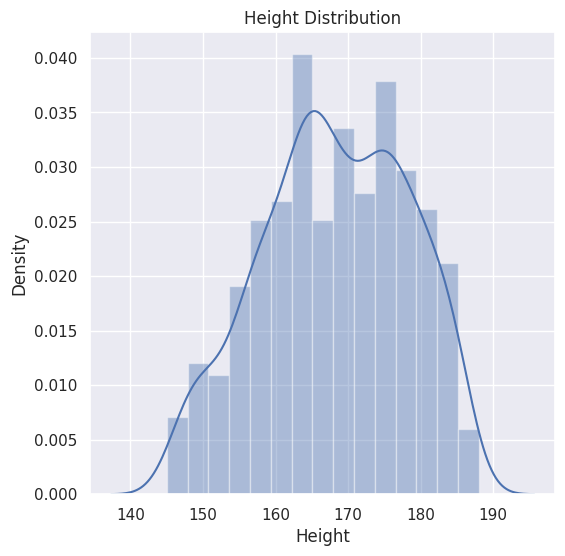

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Height'])
plt.title('Height Distribution')
plt.show()

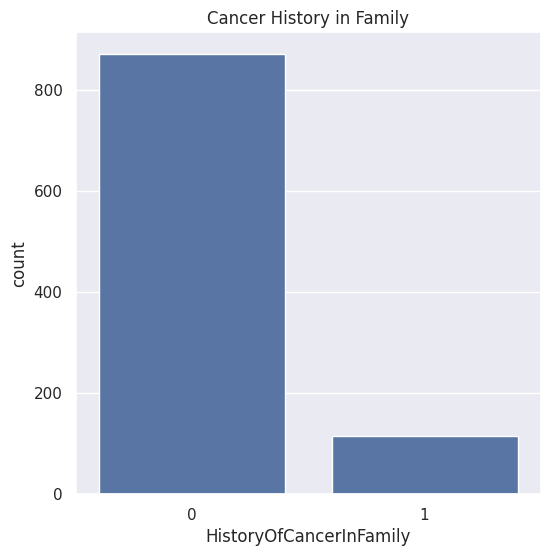

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='HistoryOfCancerInFamily', data=df)
plt.title('Cancer History in Family')
plt.show()

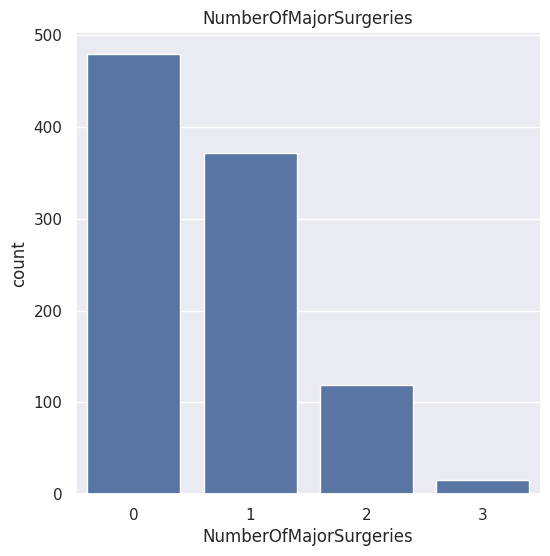

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.title('NumberOfMajorSurgeries')
plt.show()

<ipython-input-30-52eea10100e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PremiumPrice'])


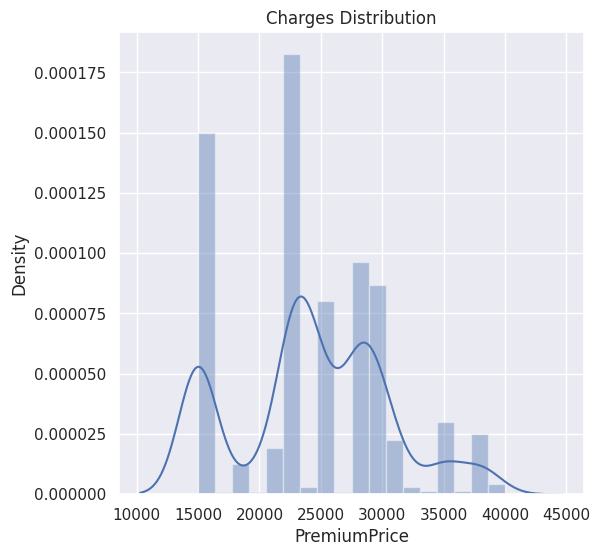

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['PremiumPrice'])
plt.title('Charges Distribution')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'BloodPressureProblems'}>],
       [<Axes: title={'center': 'AnyTransplants'}>,
        <Axes: title={'center': 'AnyChronicDiseases'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'KnownAllergies'}>,
        <Axes: title={'center': 'HistoryOfCancerInFamily'}>],
       [<Axes: title={'center': 'NumberOfMajorSurgeries'}>,
        <Axes: title={'center': 'PremiumPrice'}>, <Axes: >]], dtype=object)

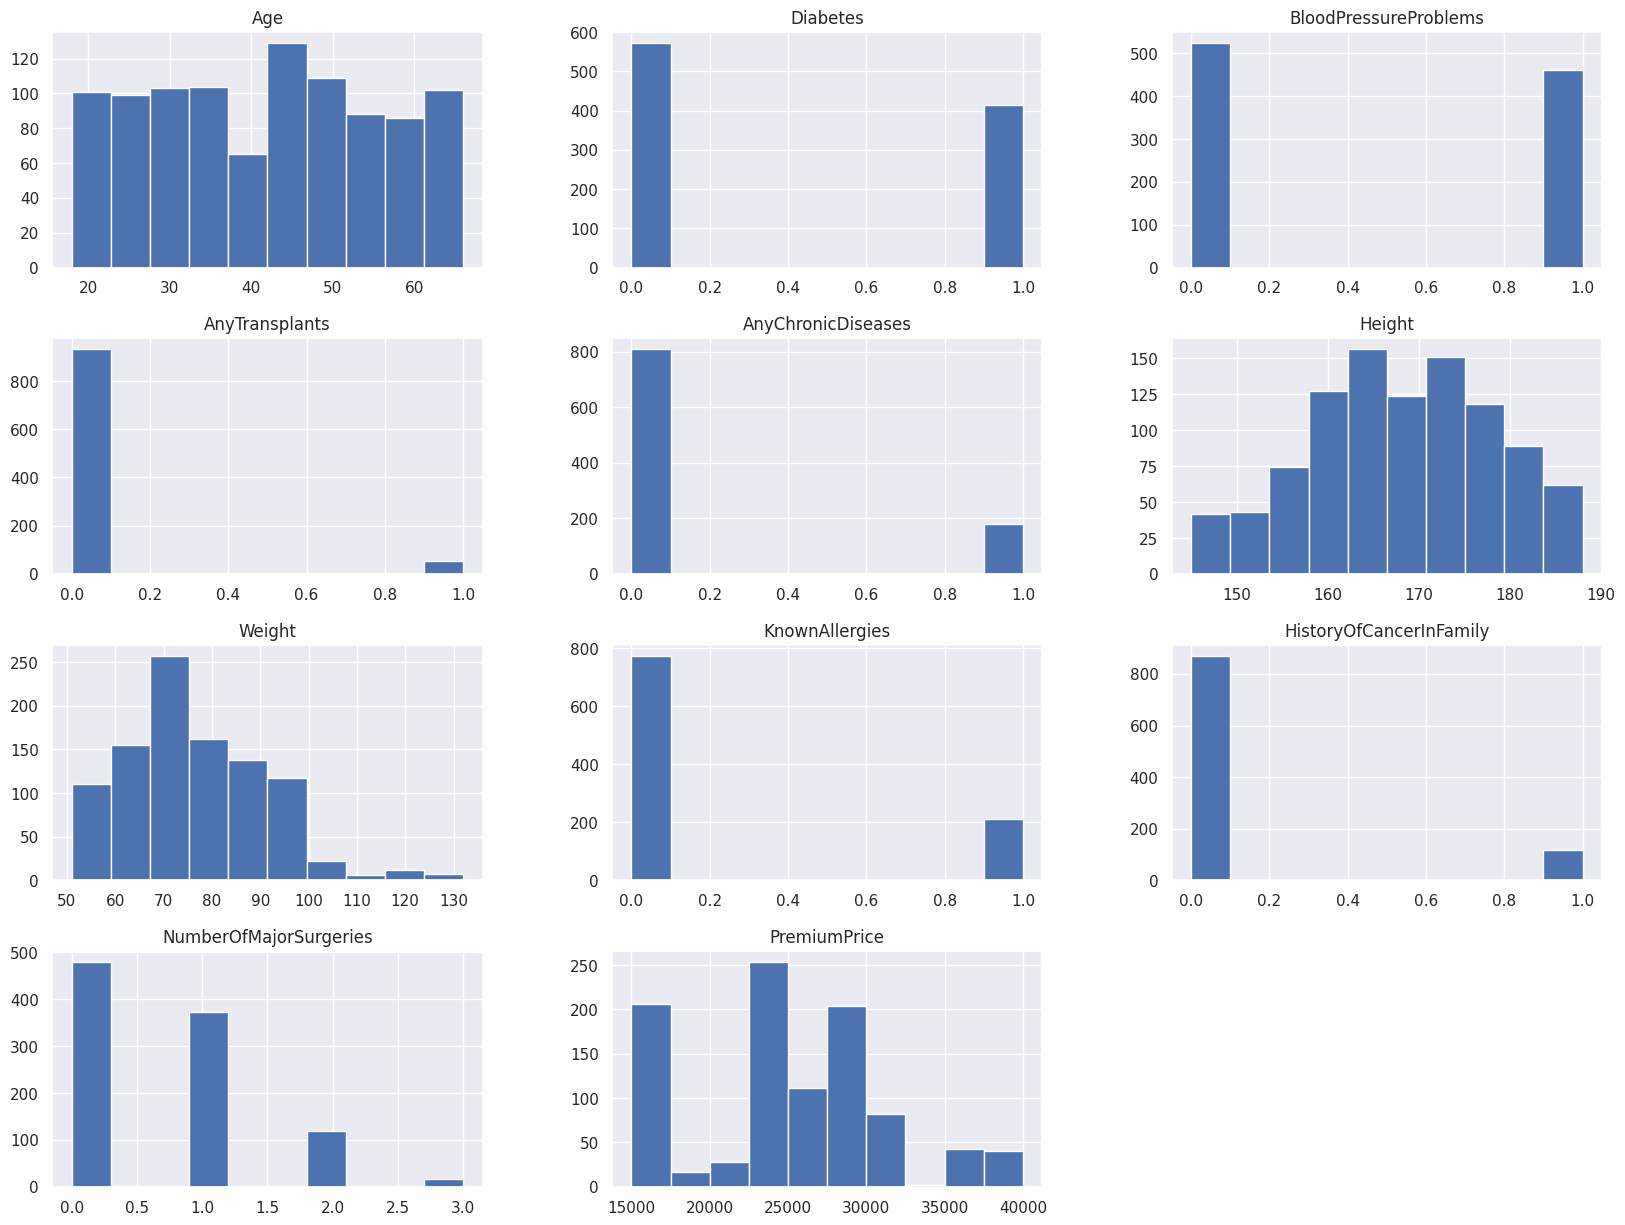

In [ ]:
df.hist(figsize=(20,15))

In [ ]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
x = df.drop(columns='PremiumPrice', axis=1)
y = df['PremiumPrice']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

**Linear Regression**

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ytrain_ = regressor.predict(xtrain)

In [ ]:
r2_train = metrics.r2_score(ytrain, ytrain_)
print('R squared vale : ', r2_train)

R squared vale :  0.6409424660765359


In [ ]:
y_ = regressor.predict(xtest)

In [ ]:
r2_test = metrics.r2_score(ytest, y_)
print('R squared vale : ', r2_test)

R squared vale :  0.6474737799506505


In [ ]:
df.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


In [ ]:
sample_data = (45,0,0,0,0,155,57,0,0,0) # first Row

# changing input_data to a numpy array
sample_data = np.asarray(sample_data)

# reshape the array
sample_data = sample_data.reshape(1,-1)

prediction = regressor.predict(sample_data)
print(prediction)

print('Original Premium price was: 25000.00')
print('The predicted Premium Price is', round(prediction[0],2))

[23249.13165747]
Original Premium price was: 25000
The predicted Premium Price is 23249.13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [ ]:
model = RandomForestRegressor(n_jobs =-1)
model.fit(xtrain, ytrain)

RandomForestRegressor(n_jobs=-1)

In [ ]:
model.score(xtest, ytest)

0.8167945168052382

In [ ]:
y_ = model.predict(xtest)
rmse = root_mean_squared_error(ytest, y_)
print('RMSE is', rmse)

RMSE is 2672.575272253073


In [ ]:
df.PremiumPrice.std()

6248.184382239689

- So RMSE is quite small

In [ ]:
df.PremiumPrice.median()

23000.0

- RMSE is near 10% of the median prediction

In [ ]:
mae = mean_absolute_error(y_, ytest)
print('MAE is', mae)

MAE is 889.7979797979798


Text(0, 0.5, 'Predicted Premiumns')

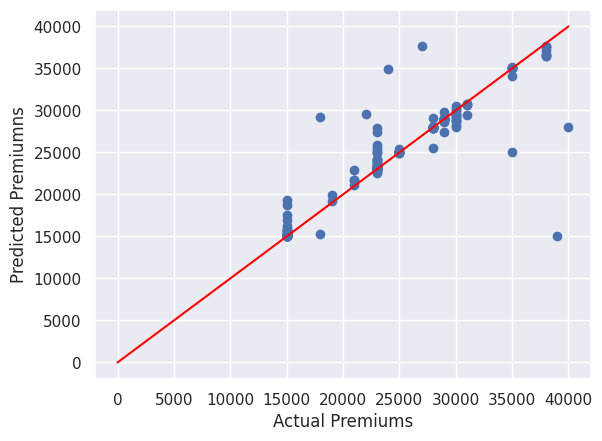

In [ ]:
plt.scatter(ytest, y_)
plt.plot(np.linspace(0, max(ytest)),  np.linspace(0, max(ytest)), color = 'red')
plt.xlabel('Actual Premiums')
plt.ylabel('Predicted Premiumns')

In [ ]:
# For Random Forest we have:
f = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True)

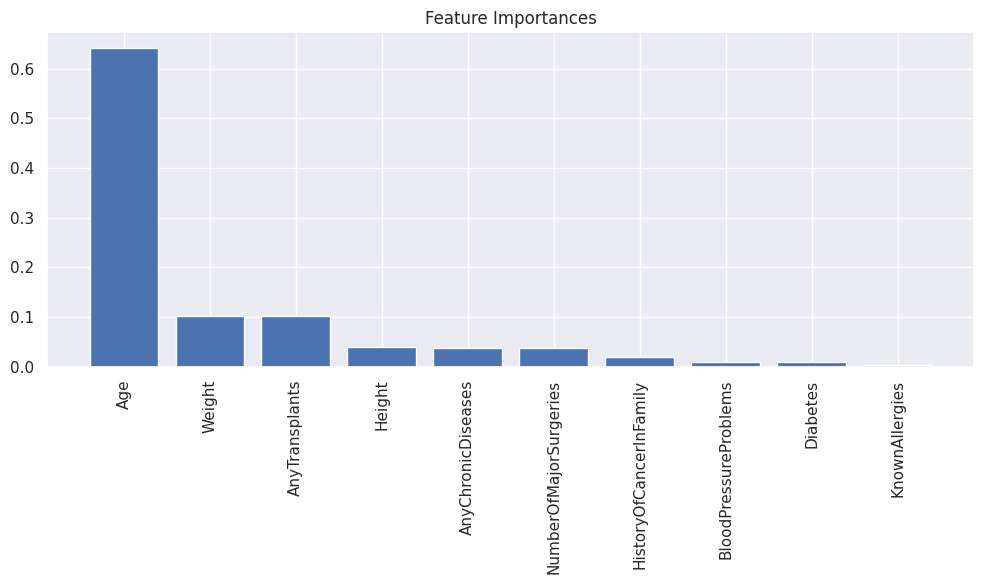

In [ ]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in f], [x[1] for x in f])
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

pg = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
     }

model = RandomForestRegressor(n_jobs= -1)

grid_model = GridSearchCV(model, param_grid = pg, cv = 5)

In [ ]:
grid_model.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]})

In [ ]:
grid_model.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [ ]:
model = grid_model.best_estimator_

model

RandomForestRegressor(min_samples_leaf=2, min_samples_split=6, n_jobs=-1)

In [ ]:
model.score(xtest, ytest)

0.8138475308659996

In [ ]:
y_ = model.predict(xtest)

In [ ]:
rmse = root_mean_squared_error(ytest, y_)
print(rmse)

2693.9846234779416


In [ ]:
mae = mean_absolute_error(ytest, y_)
mae

914.8455062053549

Text(0, 0.5, 'Predicted Premiumns')

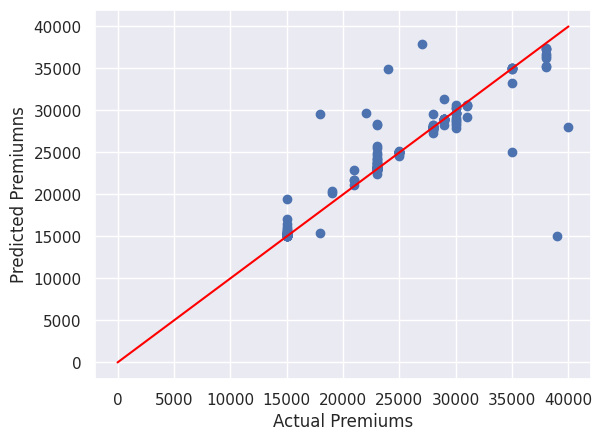

In [ ]:
plt.scatter(ytest, y_)
plt.plot(np.linspace(0, max(ytest)),  np.linspace(0, max(ytest)), color = 'red')
plt.xlabel('Actual Premiums')
plt.ylabel('Predicted Premiumns')

In [ ]:
f = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True)

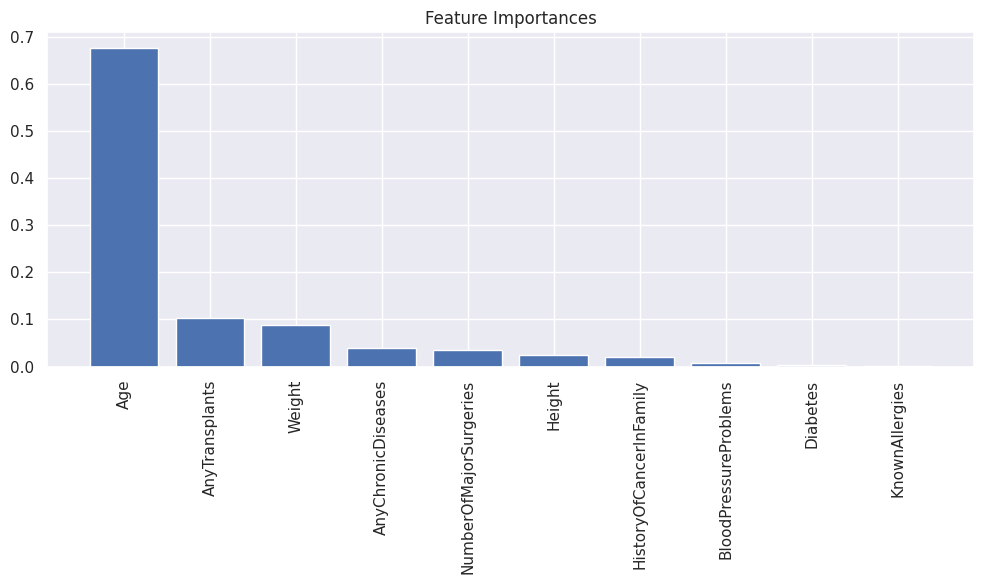

In [ ]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in f], [x[1] for x in f])
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()